In [19]:
import pandas as pd

data = {
    'A': [1, 2, None, 4, 5],
    'B': [None, 2, 3, 4, None],
    'C': ['X', 'Y', None, 'X', 'Z']
}

df = pd.DataFrame(data)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4 non-null      float64
 1   B       3 non-null      float64
 2   C       4 non-null      object 
dtypes: float64(2), object(1)
memory usage: 248.0+ bytes


In [15]:
df.tail()

,A,B,C
0,1.0,NaN,X
1,2.0,2.0,Y
2,NaN,3.0,None
3,4.0,4.0,X
4,5.0,NaN,Z


In [16]:
print("\nValores nulos por columna:") 
print(df.isnull().sum()) 



Valores nulos por columna:
A    1
B    2
C    1
dtype: int64


In [17]:
# Eliminación de filas con al menos un valor nulo 
df_dropna = df.dropna() 
print("\nDataFrame después de eliminar filas con valores nulos:") 
print(df_dropna) 



DataFrame después de eliminar filas con valores nulos:
     A    B  C
1  2.0  2.0  Y
3  4.0  4.0  X


In [20]:

# Eliminación de columnas con al menos un valor nulo 
df_dropna_column = df.dropna(axis=1) 
print("\nDataFrame después de eliminar columnas con valores nulos:") 
print(df_dropna_column) 



DataFrame después de eliminar columnas con valores nulos:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [21]:

data2 = {
    'A': [1, 2, None, 4, 5],
    'B': [None, 2, 3, 4, None]
    }
df2 = pd.DataFrame(data2)

# Imputación utilizando la estrategia de media
df2_imputed_mean = df2.fillna(df2.mean())
print("\nDataFrame después de imputar valores nulos usando la media:")
print(df2_imputed_mean )



DataFrame después de imputar valores nulos usando la media:
     A    B
0  1.0  3.0
1  2.0  2.0
2  3.0  3.0
3  4.0  4.0
4  5.0  3.0


In [6]:
df = pd.DataFrame(data)

# Imputación de valores nulos en columnas categóricas usando la moda para categoricos y media para numericos
df_imputed = df.apply(lambda col: col.fillna(col.mode()[0]) if col.dtype == 'object' else col.fillna(col.mean()), axis=0)
print("\nDataFrame después de imputar valores nulos en columnas :")
print(df_imputed)


DataFrame después de imputar valores nulos en columnas :
     A    B  C
0  1.0  3.0  X
1  2.0  2.0  Y
2  3.0  3.0  X
3  4.0  4.0  X
4  5.0  3.0  Z


In [7]:
df = pd.DataFrame(data)

# Imputación de valores nulos en columnas categóricas usando la moda para categoricos y mediana para numericos
df_imputed= df.apply(lambda col: col.fillna(col.mode()[0]) 
if col.dtype == 'object' else col.fillna(col.median()),
 axis=0)
print("\nDataFrame después de imputar valores nulos en columnas categóricas usando la moda:")
print(df_imputed)



DataFrame después de imputar valores nulos en columnas categóricas usando la moda:
     A    B  C
0  1.0  3.0  X
1  2.0  2.0  Y
2  3.0  3.0  X
3  4.0  4.0  X
4  5.0  3.0  Z


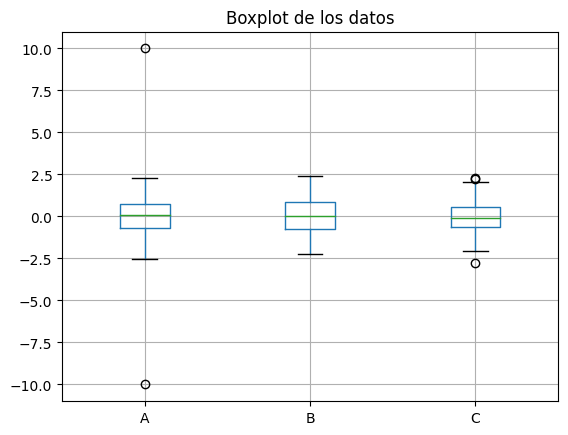

Valores atípicos detectados:
A    2
B    0
C    3
dtype: int64


In [9]:
import numpy as np
import matplotlib.pyplot as plt
# Generamos un conjunto de datos de prueba con valores atípicos
np.random.seed(0)
data = {
    'A': np.random.normal(loc=0, scale=1, size=100),
    'B': np.random.normal(loc=0, scale=1, size=100),
    'C': np.random.normal(loc=0, scale=1, size=100)
}
# Introducimos valores atípicos en la columna 'A'
data['A'][0] = 10
data['A'][1] = -10
df = pd.DataFrame(data)

# Creamos un boxplot para visualizar la distribución de los datos
df.boxplot()
plt.title('Boxplot de los datos')
plt.show()

# Calculamos el rango intercuartílico (IQR) para cada columna
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Definimos el límite para considerar valores atípicos
outlier_threshold = 1.5

# Identificamos valores atípicos utilizando el criterio del IQR
outliers = (df < (Q1 - outlier_threshold * IQR)) | (df > (Q3 + outlier_threshold * IQR))

print("Valores atípicos detectados:")
print(outliers.sum())

In [24]:
import pandas as pd
import numpy as np

# Creamos un DataFrame de ejemplo con los días de la semana
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Creamos un DataFrame con una columna de días de la semana
df = pd.DataFrame({'Dia': dias_semana})
print("DataFrame original:")
print(df)

# Creamos una función para codificar los días de la semana usando seno y coseno
def codificar_dia(dia):
    angulo = dias_semana.index(dia) * (2 * np.pi / len(dias_semana))
    return np.sin(angulo), np.cos(angulo)

# Aplicamos la función a cada fila del DataFrame
df[['Seno_Dia', 'Coseno_Dia']] = df['Dia'].apply(codificar_dia).apply(pd.Series)

print("\nDataFrame después de codificar los días de la semana usando seno y coseno:")
print(df)

DataFrame original:
         Dia
0      Lunes
1     Martes
2  Miércoles
3     Jueves
4    Viernes
5     Sábado
6    Domingo

DataFrame después de codificar los días de la semana usando seno y coseno:
         Dia  Seno_Dia  Coseno_Dia
0      Lunes  0.000000    1.000000
1     Martes  0.781831    0.623490
2  Miércoles  0.974928   -0.222521
3     Jueves  0.433884   -0.900969
4    Viernes -0.433884   -0.900969
5     Sábado -0.974928   -0.222521
6    Domingo -0.781831    0.623490


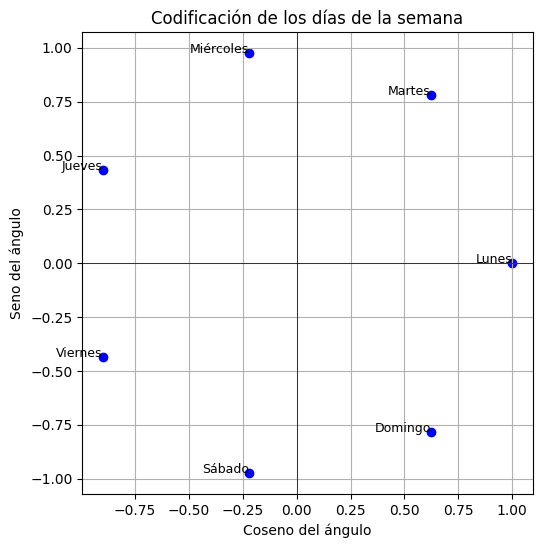

In [11]:
import matplotlib.pyplot as plt

# Creamos un gráfico de dispersión para visualizar la codificación de los días de la semana
plt.figure(figsize=(6, 6))
plt.scatter(df['Coseno_Dia'], df['Seno_Dia'], color='blue')
plt.title('Codificación de los días de la semana')
plt.xlabel('Coseno del ángulo')
plt.ylabel('Seno del ángulo')

# Añadimos etiquetas para los días de la semana
for i, dia in enumerate(dias_semana):
    plt.text(df.loc[i, 'Coseno_Dia'], df.loc[i, 'Seno_Dia'], dia, fontsize=9, ha='right')

plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

